VISUALIZATION

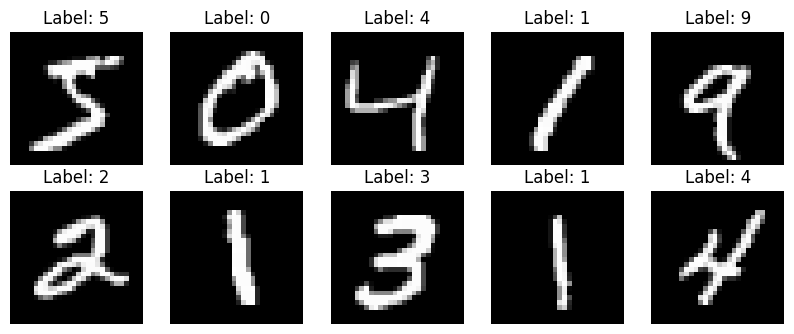

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

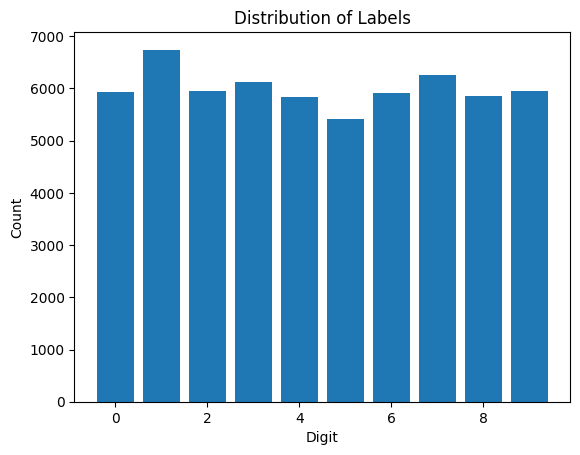

In [10]:
# Distribution of labels
unique_labels, counts = np.unique(y_train, return_counts=True)
plt.bar(unique_labels, counts)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

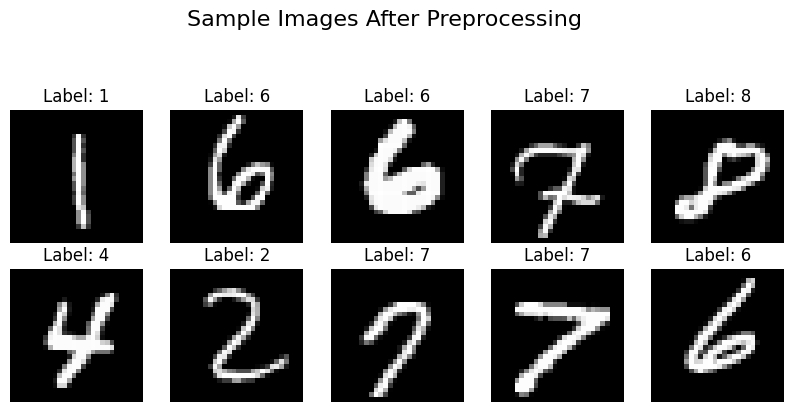

In [11]:

from sklearn.model_selection import train_test_split


# Reshape the images to have a single channel
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert the pixel values to floats and normalize them to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Display some sample images after preprocessing
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle('Sample Images After Preprocessing', fontsize=16)
plt.show()


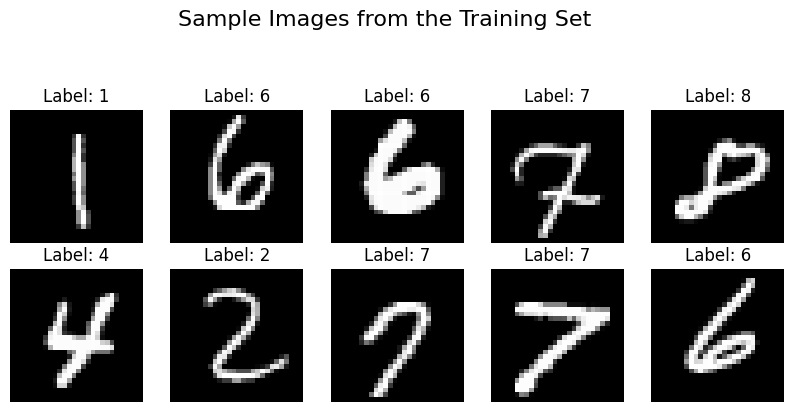

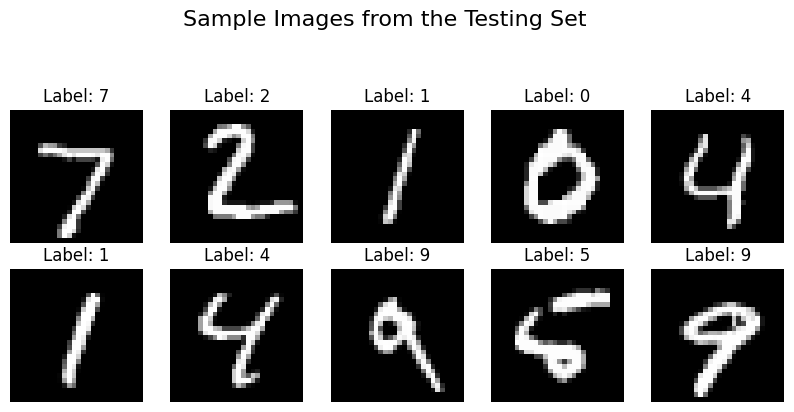

Number of samples in the training set: 54000
Number of samples in the testing set: 10000
Shape of each image: (28, 28, 1)
Number of classes: 10


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_train, y_train, x_test, and y_test are already defined

# Visualize some sample images from the training set
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle('Sample Images from the Training Set', fontsize=16)
plt.show()

# Visualize some sample images from the testing set
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.suptitle('Sample Images from the Testing Set', fontsize=16)
plt.show()

# Print basic information about the dataset split
print(f"Number of samples in the training set: {len(x_train)}")
print(f"Number of samples in the testing set: {len(x_test)}")
print(f"Shape of each image: {x_train[0].shape}")
print(f"Number of classes: {len(np.unique(y_train))}")


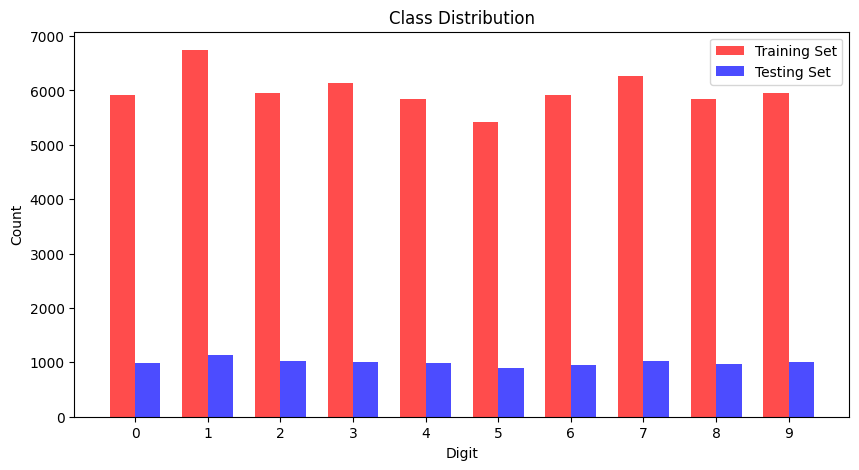

In [15]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Get unique labels and their counts for training set
unique_labels_train, counts_train = np.unique(y_train, return_counts=True)

# Get unique labels and their counts for testing set
unique_labels_test, counts_test = np.unique(y_test, return_counts=True)

# Set width of bars
bar_width = 0.35

# Plot class distribution for training set and testing set
plt.figure(figsize=(10, 5))
plt.bar(unique_labels_train - bar_width/2, counts_train, bar_width, color='red', alpha=0.7, label='Training Set')
plt.bar(unique_labels_test + bar_width/2, counts_test, bar_width, color='blue', alpha=0.7, label='Testing Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(np.arange(10))
plt.legend()
plt.show()




KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reshape the images to 1D arrays
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = knn.predict(x_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9688


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



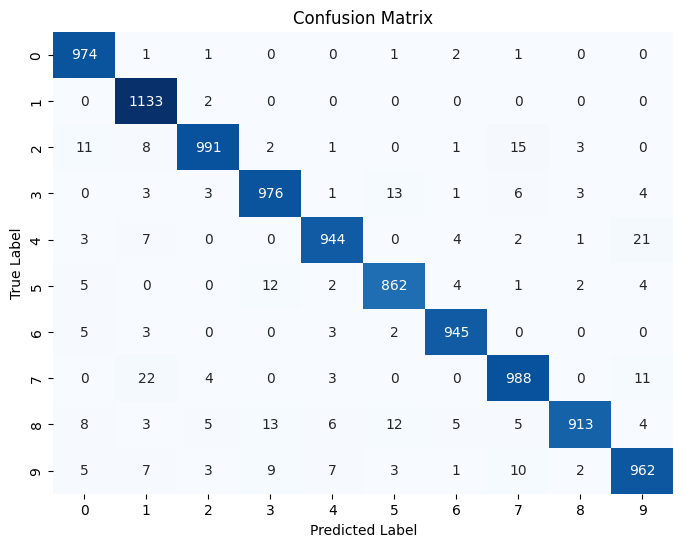

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


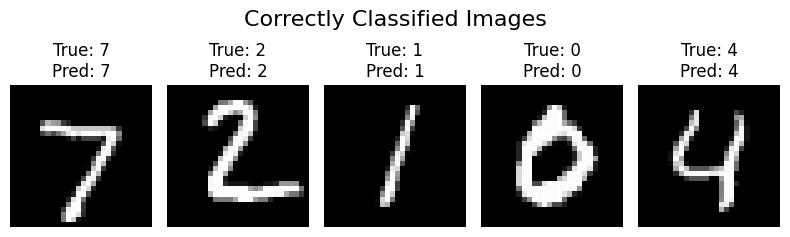

In [18]:
# Find indices of correctly and incorrectly classified images
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

# Plot correctly classified images
plt.figure(figsize=(8, 4))
plt.suptitle('Correctly Classified Images', fontsize=16)
for i, idx in enumerate(correct_indices[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()




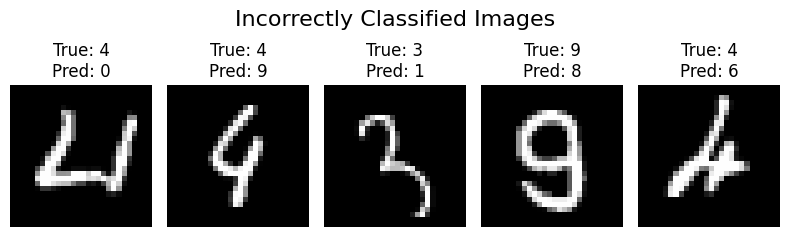

In [19]:
# Plot incorrectly classified images
plt.figure(figsize=(8, 4))
plt.suptitle('Incorrectly Classified Images', fontsize=16)
for i, idx in enumerate(incorrect_indices[:5]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

SVM

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the images to 1D arrays
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Normalize the pixel values
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# Concatenate training features and labels
x_train_concat = np.concatenate((x_train_flat, y_train.reshape(-1, 1)), axis=1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_concat[:, :-1])
y_train_concat = x_train_concat[:, -1]

# Apply PCA on test data
x_test_pca = pca.transform(x_test_flat)

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the classifier
svm_classifier.fit(x_train_pca, y_train_concat)

# Predict on the test set
y_pred_svm = svm_classifier.predict(x_test_pca)

# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

Accuracy (SVM): 0.9832


In [21]:
# Generate classification report
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



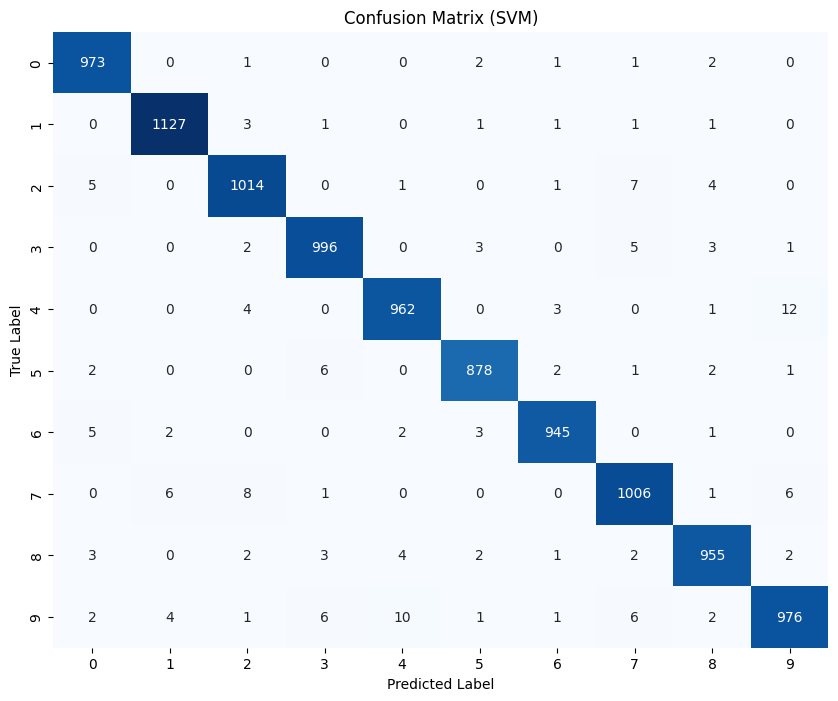

In [22]:
# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVM)')
plt.show()


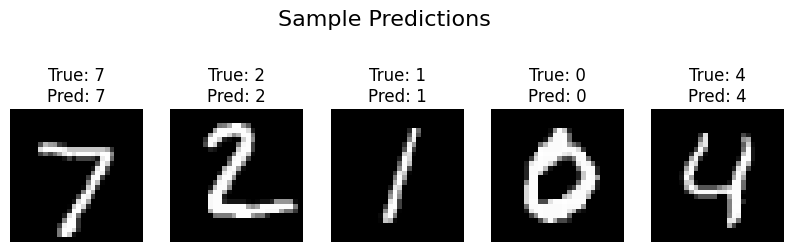

In [23]:
# Plot a grid of 5 sample images from the testing set with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    true_label = y_test[i]
    pred_label = int(y_pred_svm[i])  # Convert predicted label to integer
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.suptitle('Sample Predictions', fontsize=16)
plt.show()



MLP

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Initialize MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                               max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                               warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                               validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
                               n_iter_no_change=10, max_fun=15000)

# Train the classifier
mlp_classifier.fit(x_train_pca, y_train_concat)

# Predict on the test set
y_pred_mlp = mlp_classifier.predict(x_test_pca)

# Evaluate performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy (MLP):", accuracy_mlp)




Accuracy (MLP): 0.9787


In [26]:
# Generate classification report
print("Classification Report (MLP):")
print(classification_report(y_test, y_pred_mlp))

Classification Report (MLP):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



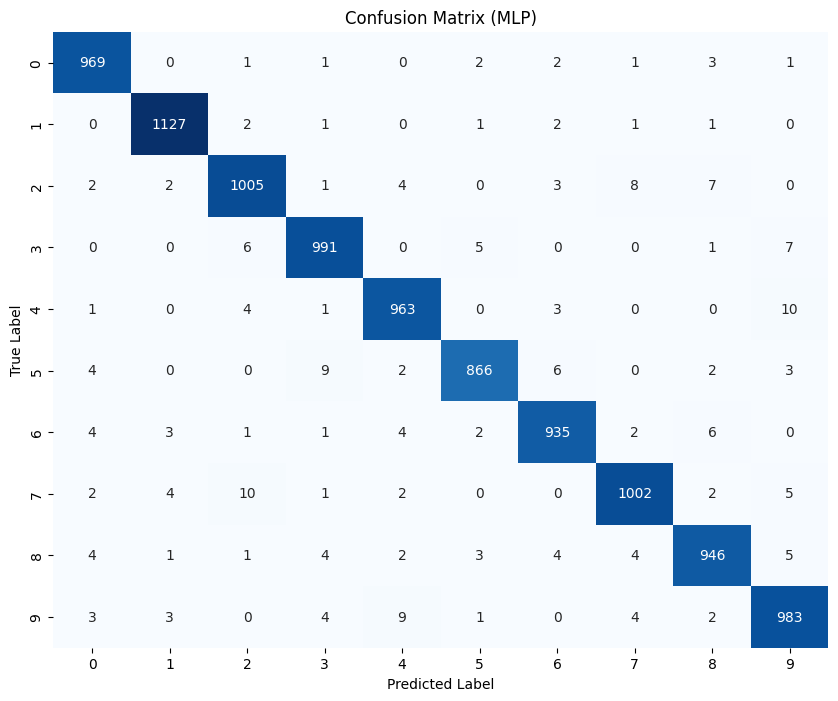

In [27]:
# Generate confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MLP)')
plt.show()

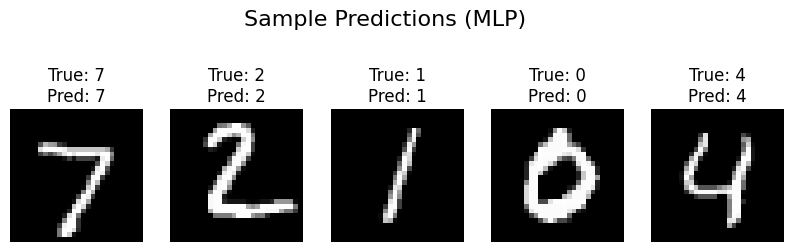

In [28]:
# Plot a grid of 5 sample images from the testing set with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    true_label = y_test[i]
    pred_label = int(y_pred_mlp[i])  # Convert predicted label to integer
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.suptitle('Sample Predictions (MLP)', fontsize=16)
plt.show()



RANDOM FOREST

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                                        bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                                        warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# Train the classifier
rf_classifier.fit(x_train_pca, y_train_concat)

# Predict on the test set
y_pred_rf = rf_classifier.predict(x_test_pca)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy (Random Forest): 0.9476


In [30]:
# Generate classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.93      0.95      0.94       982
           5       0.94      0.93      0.94       892
           6       0.96      0.97      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.91      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



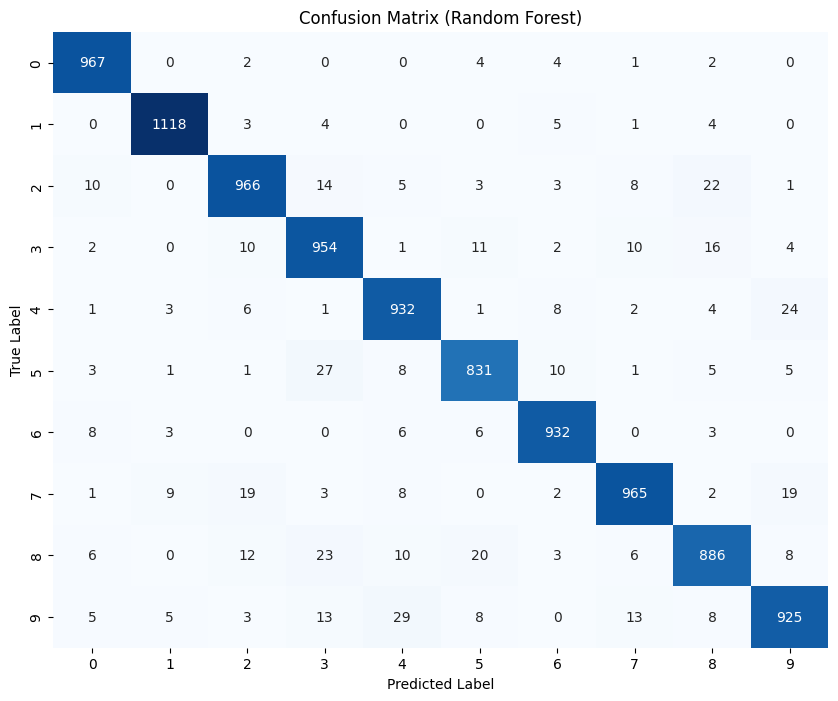

In [31]:
# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

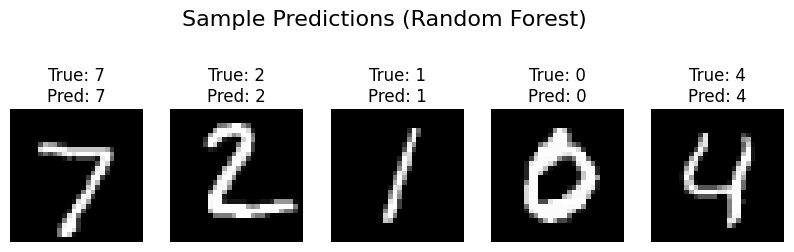

In [32]:
# Plot a grid of 5 sample images from the testing set with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    true_label = y_test[i]
    pred_label = int(y_pred_rf[i])  # Convert predicted label to integer
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.suptitle('Sample Predictions (Random Forest)', fontsize=16)
plt.show()


ANN

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input image to a 1D array
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(x_train / 255.0, y_train, epochs=5, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test / 255.0, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2777 - accuracy: 0.9199 - val_loss: 0.1286 - val_accuracy: 0.9640
Epoch 2/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1214 - accuracy: 0.9637 - val_loss: 0.1101 - val_accuracy: 0.9692
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0812 - accuracy: 0.9754 - val_loss: 0.0901 - val_accuracy: 0.9735
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0787 - val_accuracy: 0.9780
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9759
Test Loss: 0.07899335026741028
Test Accuracy: 0.9758999943733215


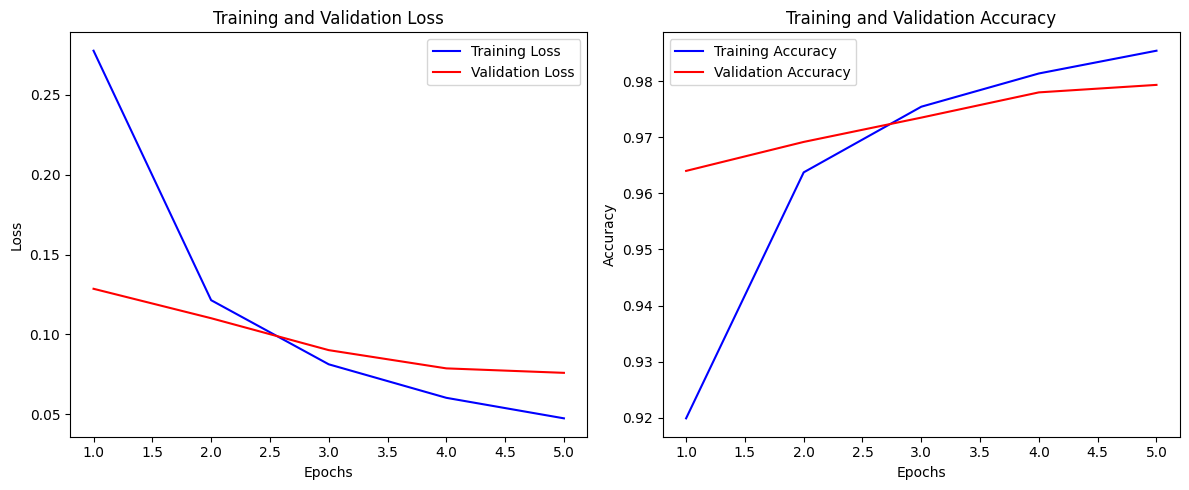

In [34]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


CNN

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the data for CNN input
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_cnn / 255.0, y_train, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_cnn / 255.0, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
1688/1688 [==============================] - 47s 27ms/step - loss: 0.1436 - accuracy: 0.9559 - val_loss: 0.0513 - val_accuracy: 0.9832
Epoch 2/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0532 - val_accuracy: 0.9850
Epoch 3/10
1688/1688 [==============================] - 47s 28ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0421 - val_accuracy: 0.9872
Epoch 4/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0545 - val_accuracy: 0.9862
Epoch 5/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0396 - val_accuracy: 0.9897
Epoch 6/10
1688/1688 [==============================] - 43s 25ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0395 - val_accuracy: 0.9925
Epoch 7/10
1688/1688 [==============================] - 47s 28ms/step - loss: 0.0095 - accuracy: 0.9965 - val_loss: 0.0527 -

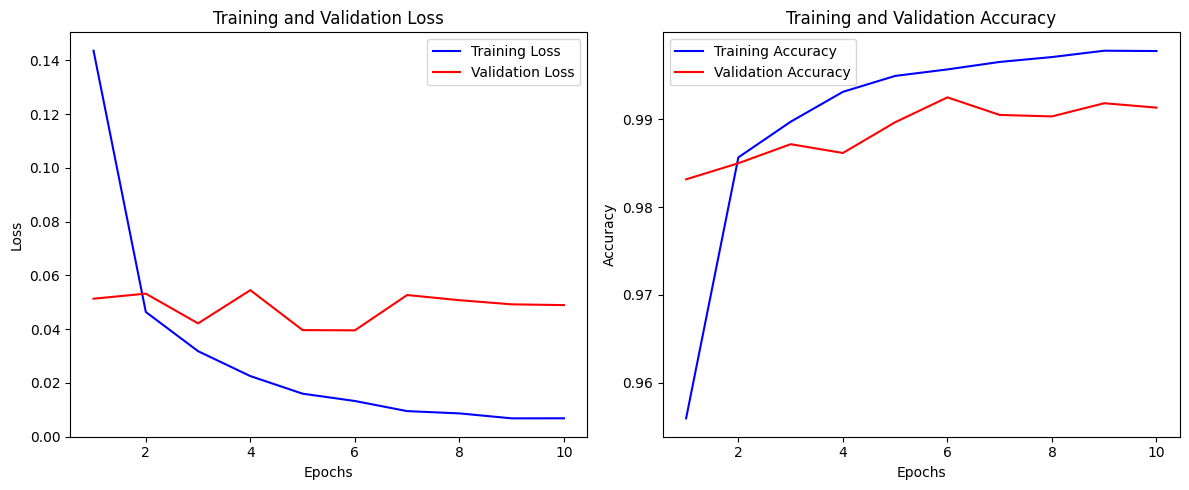

In [36]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
